#  군집분석 : 연습문제

- 붓꽃 데이터셋의 sepal length와 sepal width 피쳐를 이용하여 K-means 군집화 모델을 구축하시오.
 - standard scaler를 이용하여 표준화 수행

- 최적의 K를 찾기 위하여 다음 두가지의 방법을 수행하시오
 - elbow
 - silouette

- 최적의 K를 구한후 구축한 모델로 모든 데이터에 군집 클러스터 label을 할당하시오.

- 예제의 다음 두 함수를 이용하여 클러스터의 데이터 분포를 시각화해 보시오.
 - clusterScatter(n_cluster, X_features)
 - silhouetteViz(n_cluster, X_features)

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

X = data[['Sepal length','Sepal width']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def clusterScatter(n_cluster, X_features, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_features[:, 0], X_features[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
    plt.title(f'K-Means Clustering with K={n_cluster}')
    plt.xlabel('Scaled Sepal Length')
    plt.ylabel('Scaled Sepal Width')
    plt.show()

def silhouetteViz(n_cluster, X_features):
    # K-means 모델 생성 및 학습
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_features)
    
    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X_features, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_features, cluster_labels)
    
    print(f"n_clusters = {n_cluster} 일 때 평균 실루엣 점수: {silhouette_avg:.4f}")

    y_lower = 10
    plt.figure(figsize=(8, 6))
    
    for i in range(n_cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_cluster)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    plt.title(f"Silhouette Plot for K={n_cluster}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()



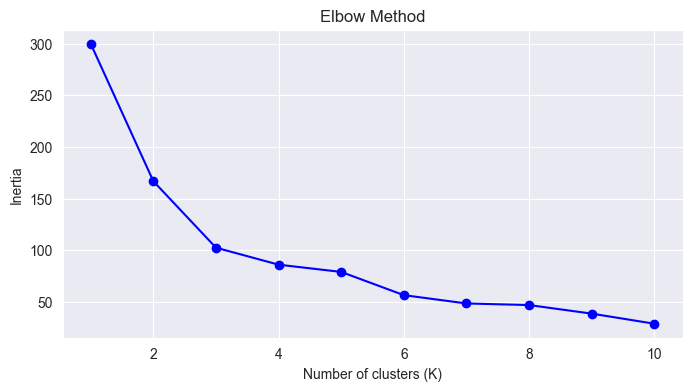

In [3]:
# 3. 최적의 K 찾기: Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()
# k=3 일때 elbow 드러남


n_clusters = 3 일 때 평균 실루엣 점수: 0.4359


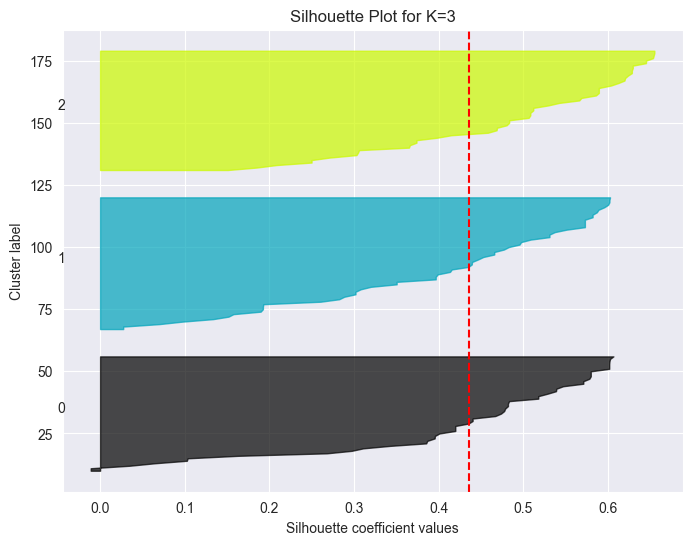

In [4]:
# 4. 최적의 K 찾기: Silhouette Analysis (예: K=3일 때 확인)
optimal_k = 3
silhouetteViz(optimal_k, X_scaled)

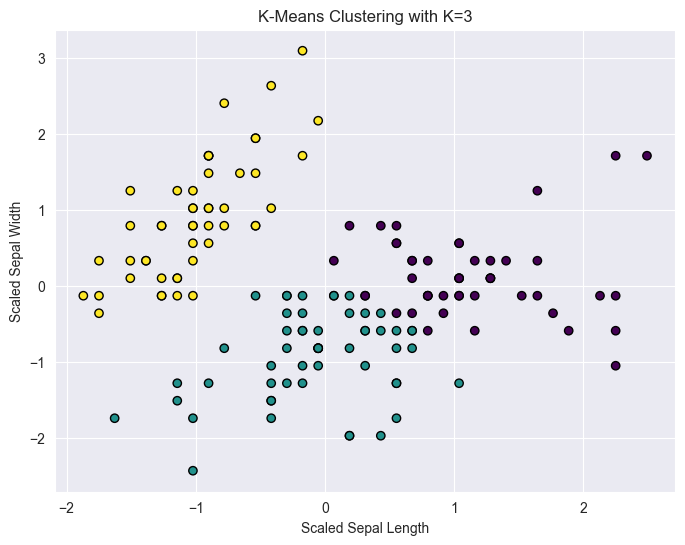


최종 데이터 확인:
   Sepal length  Sepal width  cluster_label
0           5.1          3.5              2
1           4.9          3.0              2
2           4.7          3.2              2
3           4.6          3.1              2
4           5.0          3.6              2


In [5]:
# 5. 최종 모델 구축 및 라벨 할당
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = final_kmeans.fit_predict(X_scaled)

# 데이터프레임에 라벨 할당
data['cluster_label'] = labels

# 6. 결과 시각화 (Cluster Scatter)
clusterScatter(optimal_k, X_scaled, labels)

print("\n최종 데이터 확인:")
print(data[['Sepal length', 'Sepal width', 'cluster_label']].head())